In [1]:
import os,re
HostName=os.uname()[1]
print (HostName)

homeserver


In [5]:
import vresult_data_com as vrc
import vresult_data_reward as vdr
import config as sc

system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D"
process_name="EvalAgent_2"
Lstock, LEvalT, LYM, lgc=vrc.get_addon_setting(system_name,process_name)
i0=vdr.ana_reward(system_name, process_name,Lstock, LEvalT, LYM,lgc)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
if False:
    plt.rcParams["figure.figsize"] = (20,10)
    fig=plt.figure()
    i0.show_reward(fig, 250,[],[])
    plt.show()
    


current EvalT from 250 to 17250 specify end Eval(Y/N)?N


In [7]:
import vresult_data_com as vrc
import vresult_data_reward as vdr
import config as sc
system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D_try"
process_name="EvalAgent_2"
Lstock, LEvalT, LYM, lgc=vrc.get_addon_setting(system_name,process_name)
i1=vdr.ana_reward(system_name, process_name,Lstock, LEvalT, LYM,lgc)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
if False:
    plt.rcParams["figure.figsize"] = (20,10)
    fig=plt.figure()
    i1.show_reward(fig, 250,[],[])
    plt.show()


current EvalT from 250 to 7000 specify end Eval(Y/N)?N


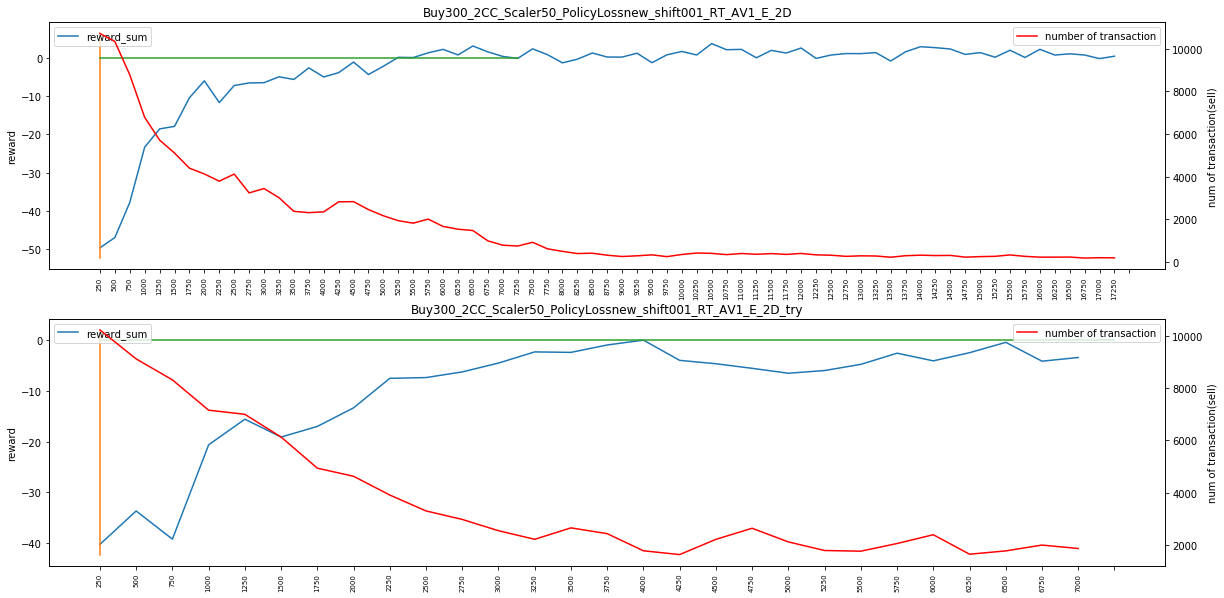

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
fig.add_subplot(211)
fig.add_subplot(212)
allaxes = fig.get_axes()
if "i0" in globals():
    i0.plot_reward_count(allaxes[0], 250)
    allaxes[0].plot([0,len(LEvalT)],[0,0])
    allaxes[0].set_title(i0.system_name)
if "i1" in globals():
    i1.plot_reward_count(allaxes[1], 250)
    allaxes[1].plot([0,len(LEvalT)],[0,0])
    allaxes[1].set_title(i1.system_name)
plt.show()


In [ ]:
#Estimate V3 failed sell transaction rough mean reward
dft=i1.df[i1.df["valid_trans_kpi"]!=1.0]
mean_reward=((dft["sell_price"]-dft["buy_price"])/dft["buy_price"]).mean()
print (mean_reward) 
#Set the V3 fail sell transaction to rough mean reward
#i1.df.loc[i1.df["valid_trans_kpi"]!=1,"reward"]=mean_reward


In [ ]:
#eval one evalcount trans number on per stock
import pandas as pd
dft=i1.df[i1.df["valid_trans_kpi"]==1.0]
dftt=dft[dft["EvalT"]==6750]
dfttt=dftt[["stock","reward"]].groupby("stock").\
            agg(reward=pd.NamedAgg(column="reward", aggfunc="sum"),
                count=pd.NamedAgg(column="reward",aggfunc="count")
                )
print (dfttt["count"].describe())
print (dfttt["count"].sum())
print (dfttt[dfttt["count"]==dfttt["count"].min()])

In [36]:
#to show specific evalT and stock tranactions
import pandas as pd
import prettytable as pt

def PrintPerEvalPerStock(EvalT,Stock,df):
    print ("Stock={0} Eval={1}".format(Stock,EvalT),end='')
    dfr=df[(df["EvalT"]==EvalT)&(df["stock"]==Stock)]
    if len(dfr)==0:
        print ("No transaction for {0} {1}".format(Stock,EvalT))
        return
    
    field_names=['trans_start', 'trans_end', 'reward','buy_price', 'sell_price', 'valid_trans_kpi']
    dfr=dfr[field_names]
    tb=pt.PrettyTable()
    tb.field_names=field_names
    print ("accumulate reward is {0:.2f}".format(dfr["reward"].sum()))
    for idx,row in dfr.iterrows():
        tb.add_row(row)
    print (tb)

Stock="SH600000"
for EvalT in list(range(5000,5200,250)):
    PrintPerEvalPerStock(EvalT,Stock,i0.df)
for EvalT in list(range(5000,5200,250)):
    PrintPerEvalPerStock(EvalT,Stock,i1.df)

Stock=SH600000 Eval=5000accumulate reward is 0.40
+-------------+------------+----------------------+-----------+------------+-----------------+
| trans_start | trans_end  |        reward        | buy_price | sell_price | valid_trans_kpi |
+-------------+------------+----------------------+-----------+------------+-----------------+
|  20200108.0 | 20200115.0 |         0.0          |   12.39   |   12.41    |       1.0       |
|  20200109.0 | 20200115.0 |       -0.0016        |   12.41   |   12.41    |       1.0       |
|  20200110.0 | 20200115.0 |        0.0008        |   12.38   |   12.41    |       1.0       |
|  20200113.0 | 20200115.0 |        0.0032        |   12.35   |   12.41    |       1.0       |
|  20200205.0 | 20200212.0 |        0.0115        |   10.65   |   10.79    |       1.0       |
|  20200206.0 | 20200211.0 |        0.0105        |   10.72   |   10.85    |       1.0       |
|  20200207.0 | 20200212.0 |        0.0049        |   10.72   |   10.79    |       1.0       |


In [ ]:
#Ana on finished and unfinished transaction per EvalT

import prettytable as pt
def unfinished_tran(EvalT,df):
    dfr=df[df["EvalT"]==EvalT]
    Buy_Count=len(dfr)
    Sell_Count=len(dfr[~(dfr["valid_trans_kpi"]!=1)])
    Unfinished_Count=len(dfr[dfr["valid_trans_kpi"]!=1])
    reward_sum=dfr["reward"].sum()
    adj_reward_sum = reward_sum+Unfinished_Count*0.07
    return [EvalT,Buy_Count,Sell_Count,Unfinished_Count,"{0:.2f}".format(reward_sum),"{0:.2f}".format(adj_reward_sum),
            "{0:.4f}".format(adj_reward_sum/Buy_Count),"{0:.4f}".format(adj_reward_sum/Sell_Count)]

tb = pt.PrettyTable()
tb.field_names = ["EvalT","Buy Count","Sell Count", "Unfinished Count","Reward","Adj_reward","RewardPerBuy","RewardPerSell"]

for ET in list(range(250,10000,250)):
    tb.add_row(unfinished_tran(ET,i0.df))       
print(tb)

tb = pt.PrettyTable()
tb.field_names = ["EvalT","Buy Count","Sell Count", "Unfinished Count","Reward","Adj_reward","RewardPerBuy","RewardPerSell"]

for ET in list(range(250,10000,250)):
    tb.add_row(unfinished_tran(ET,i1.df))       
print(tb)

In [ ]:
help(print)